## 1. Data Exploration

1.1 Load the dataset


In [ ]:
import pandas as pd


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/pima-indians-diabetes-database


In [ ]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

1.2 Explore basic statistics and check for missing or abnormal values

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
(df == 0).sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


1.3    - Visualize class distribution.

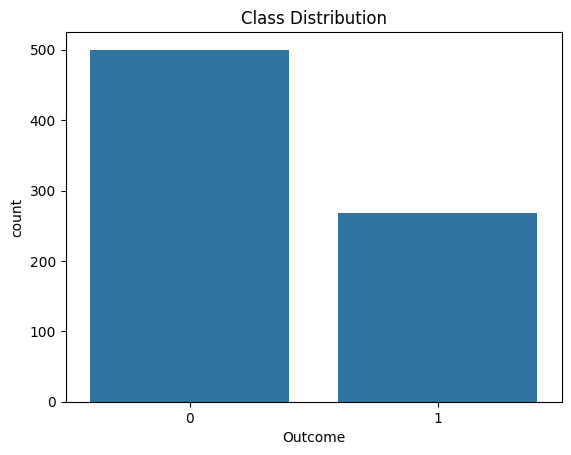

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Outcome', data=df)
plt.title('Class Distribution')
plt.show()

1.4 Finding Outliers

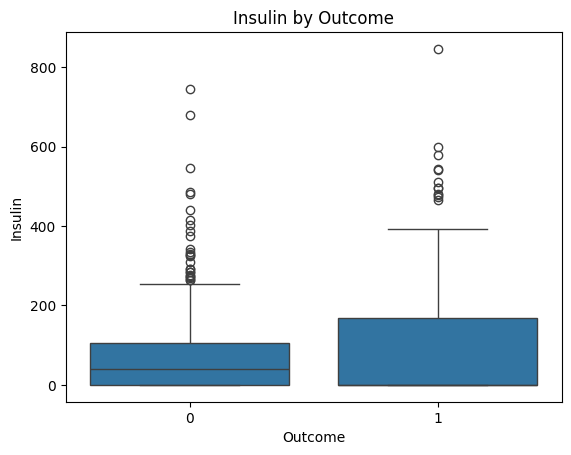

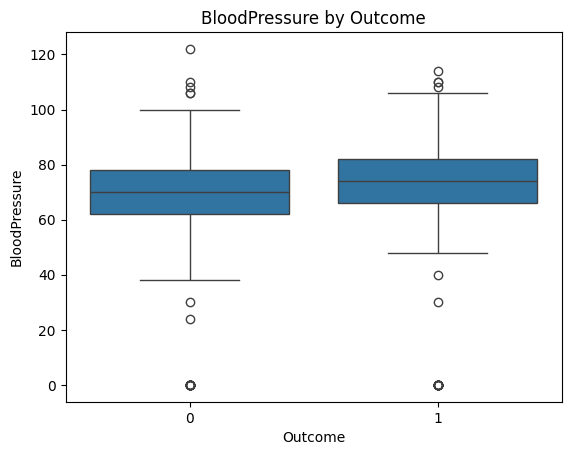

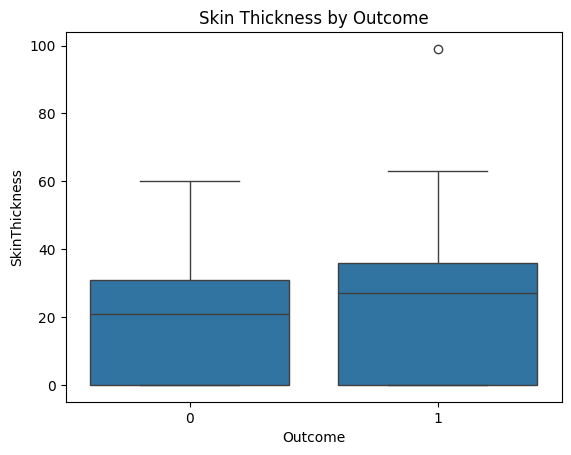

In [ ]:


sns.boxplot(x='Outcome', y='Insulin', data=df)
plt.title('Insulin by Outcome')
plt.show()

sns.boxplot(x='Outcome', y='BloodPressure', data=df)
plt.title('BloodPressure by Outcome')
plt.show()
sns.boxplot(x='Outcome', y='SkinThickness', data=df)
plt.title('Skin Thickness by Outcome')
plt.show()


# 2. Data Preprocessing

2.1 Filling the 0s

In [ ]:
cols_with_zeros = ['BloodPressure', 'SkinThickness', 'Insulin','Glucose','BMI']

for col in cols_with_zeros:
    df[col] = df.groupby('Outcome')[col].transform(
        lambda x: x.mask(x == 0, x[x != 0].median())
    )

In [ ]:
df['Insulin'] = df.groupby('Outcome')['Insulin'].transform(
    lambda x: x.replace(0, x.median())
)
df['SkinThickness'] = df.groupby('Outcome')['SkinThickness'].transform(
    lambda x: x.replace(0, x.median())
)
df['BloodPressure'] = df.groupby('Outcome')['BloodPressure'].transform(
    lambda x: x.replace(0, x.median())
)

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,169.5,33.6,0.627,50,1
1,1,85,66.0,29,102.5,26.6,0.351,31,0
2,8,183,64.0,32,169.5,23.3,0.672,32,1
3,1,89,66.0,23,94.0,28.1,0.167,21,0
4,0,137,40.0,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180.0,32.9,0.171,63,0
764,2,122,70.0,27,102.5,36.8,0.340,27,0
765,5,121,72.0,23,112.0,26.2,0.245,30,0
766,1,126,60.0,32,169.5,30.1,0.349,47,1


In [ ]:
print(df.groupby('Outcome')['Insulin'].median())


Outcome
0    102.5
1    169.5
Name: Insulin, dtype: float64


In [ ]:
(df == 0).sum()


,0
Pregnancies,111
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,500


2.2 Apply normalization or standardization (Using StandardScalar)


In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()


2.3 Split the data into training and test sets

In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop('Outcome', axis=1)
y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

# 3. Model Building

3.1 Using tf.keras.models.Sequential to define the MLP.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout
model = Sequential()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3.2 Add dense layers with activation functions like relu and sigmoid (Bouns: Add regularization (Dropout, L2))

In [ ]:
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.3)),
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3)),
# 3.3 Output layer should use 1 neuron with sigmoid activation (binary classification).
model.add(Dense(1, activation='sigmoid'))

# 4. Model Compilation

4.1  
- Use binary_crossentropy as the loss function.
- Use adam as the optimizer.
- Track metrics like accuracy.
- Bouns: Using Early Stop, Balance the class weights

In [ ]:
from sklearn.utils import class_weight
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Compute class weights
weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i: weights[i] for i in range(len(weights))}

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
#--------------------------------------------------------------#
# 5. Train the model - Use validation split or cross-validation
#---------------------------------------------------------------#
 history = model.fit(x_train, y_train, epochs=30, batch_size=16, class_weight=class_weights, verbose=1, validation_split=0.1,callbacks=[early_stop])


#--------------------------------------------------------------#
# 6. Evaluate
#--------------------------------------------------------------#

y_pred = (model.predict(x_test) > 0.6).astype("int32")
print(classification_report(y_test, y_pred))

Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8542 - loss: 0.3900 - val_accuracy: 0.8871 - val_loss: 0.2881
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8591 - loss: 0.3514 - val_accuracy: 0.8710 - val_loss: 0.2840
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8714 - loss: 0.3142 - val_accuracy: 0.8710 - val_loss: 0.2882
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8426 - loss: 0.3354 - val_accuracy: 0.8710 - val_loss: 0.2831
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8409 - loss: 0.3829 - val_accuracy: 0.8710 - val_loss: 0.2894
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8686 - loss: 0.2688 - val_accuracy: 0.8710 - val_loss: 0.2874
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8543 - loss: 0.3094 - val_accuracy: 0.8710 - val_loss: 0.2741
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8763 - loss: 0.3380 - val_accuracy: 0.8710 - val_loss

In [ ]:
history = model.fit(x_train, y_train, epochs=30, batch_size=16, class_weight=class_weights, verbose=1, validation_split=0.1,callbacks=[early_stop])


# 6. Model Evaluation


   - Evaluate the model on the test set using .evaluate().


In [ ]:
results = model.evaluate(X_test, y_test)


   - Display metrics: accuracy, precision, recall.


In [ ]:
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])
print("Test Precision:", results[2])
print("Test Recall:", results[3])

   - Plot confusion matrix and learning curves (loss/accuracy over epochs).


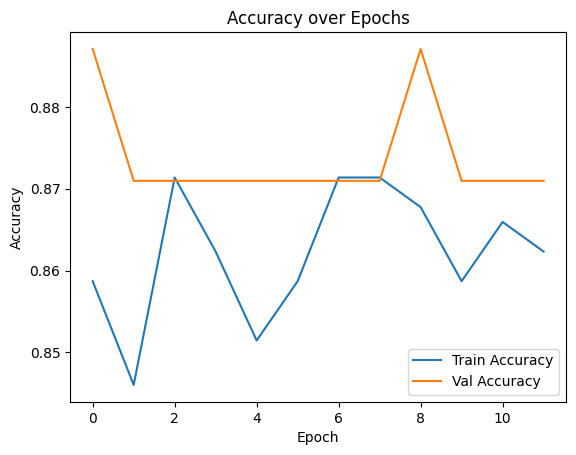

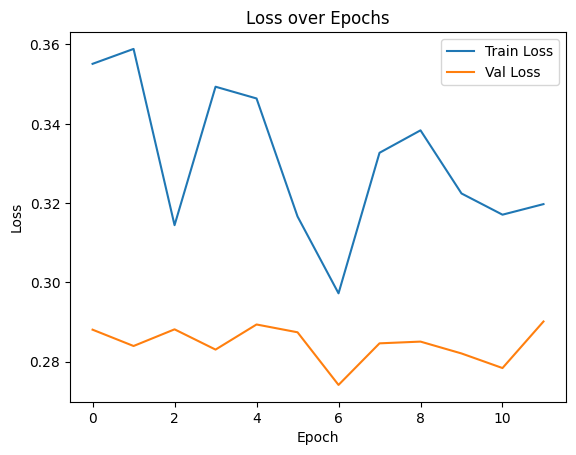

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


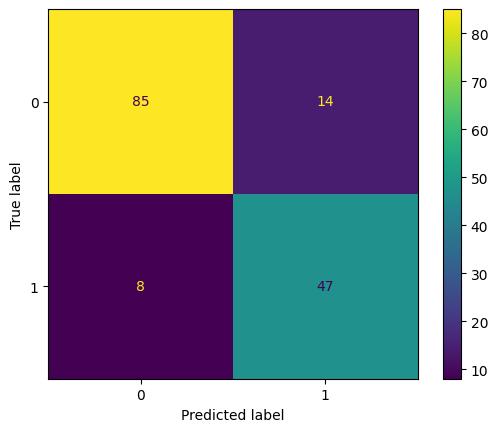

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")


Accuracy: 0.8571



#  Bouns:  
 Save and load the trained model.

In [ ]:
model.save('final_model_acc86.h5')